In [1]:
import importlib
import pickle
import numpy as np
from sklearn.decomposition import PCA
from Utils import Processing, Visualizing

In [81]:
importlib.reload(Processing)
importlib.reload(Visualizing)

<module 'Utils.Visualizing' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Utils/Visualizing.py'>

In [3]:
dict_train_count, dict_test_count = Processing.class_image_occurences()

In [4]:
dict_train_count

{'ModerateDemented': 52,
 'VeryMildDemented': 1792,
 'MildDemented': 717,
 'NonDemented': 2560,
 'Total': 5121}

In [5]:
dict_test_count

{'ModerateDemented': 12,
 'VeryMildDemented': 448,
 'MildDemented': 179,
 'NonDemented': 640,
 'Total': 1279}

In [6]:
class_weights = Processing.class_weights()
class_weights

{'ModerateDemented': 1.0,
 'VeryMildDemented': 0.008885850991114148,
 'MildDemented': 0.05329445078399054,
 'NonDemented': 0.0}

In [7]:
X_train, y_train, labels_list_train = Processing.train_numpy_arrays(class_weights=class_weights)

In [8]:
X_train.shape

(5121, 208, 176)

In [9]:
img_height=208
img_width=176

In [10]:
X_train_pca = X_train.reshape(X_train.shape[0], img_height*img_width)
X_train_pca.shape

(5121, 36608)

In [11]:
pca = PCA(n_components=0.95)
pca.fit(X_train_pca)
n_features = pca.n_components_
n_features

693

In [11]:
pca = PCA(n_components=729) # 729 = 27x27, 26x26=676 < 693 (square image)
pca.fit(X_train_pca)
X_train_pca = pca.transform(X_train_pca)
X_train_pca.shape

(5121, 729)

In [12]:
np.save('PCA_Data/X_train_pca.npy', X_train_pca)

In [14]:
# save the model to disk
filename = 'PCA_Data/pca_model.pkl'
pickle.dump(pca, open(filename, 'wb'))

In [15]:
# free memory
del X_train
del y_train
del labels_list_train
del X_train_pca

In [43]:
X_test, y_test, labels_list_test = Processing.test_numpy_arrays(class_weights=class_weights)

In [44]:
X_test.shape

(1279, 208, 176)

In [45]:
X_test_pca = X_test.reshape(X_test.shape[0], img_height*img_width)
X_test_pca.shape

(1279, 36608)

In [46]:
X_test_pca = pca.transform(X_test_pca)
X_test_pca.shape

(1279, 729)

In [47]:
np.save('PCA_Data/X_test_pca.npy', X_test_pca)

In [48]:
X_test_pca_reconstructed = pca.inverse_transform(X_test_pca)
X_test_pca_reconstructed.shape

(1279, 36608)

In [49]:
X_test_pca_reconstructed = X_test_pca_reconstructed.reshape(X_test_pca_reconstructed.shape[0], img_height, img_width)
X_test_pca_reconstructed.shape

(1279, 208, 176)

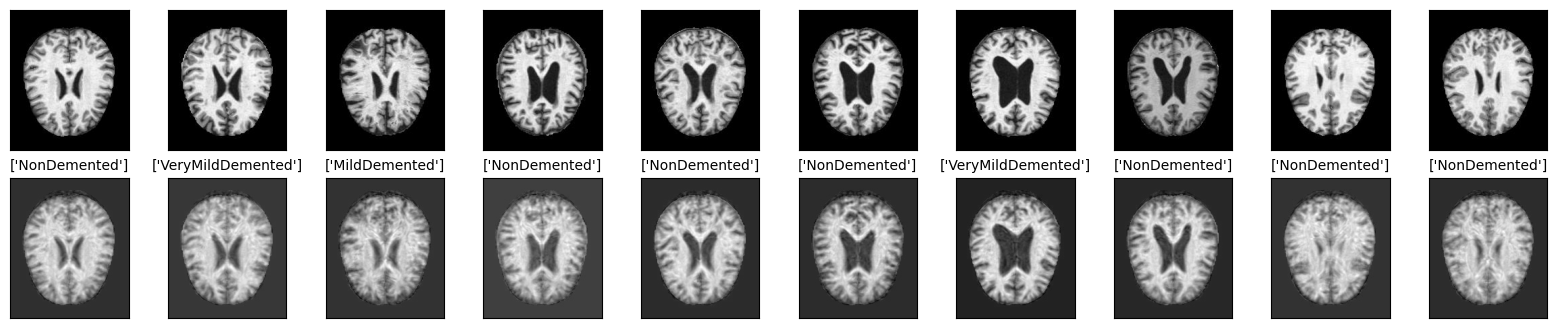

In [82]:
Visualizing.display([X_test, X_test_pca_reconstructed], labels_list_test, n=10)